In [1]:
import itertools
import random

from sklearn import metrics, svm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

In [2]:
data = np.load("data1000.npy")
data.shape

(1000, 784)

In [3]:
df = pd.DataFrame({'data': list(data)})
df

,data
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...
995,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
996,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
997,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
998,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [4]:
ground_true = [[str(number)] * 100 for number in range(10)]
ground_true = list(itertools.chain(*ground_true))

df["labels"] = ground_true
df

,data,labels
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
...,...,...
995,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",9
996,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",9
997,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",9
998,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",9


3


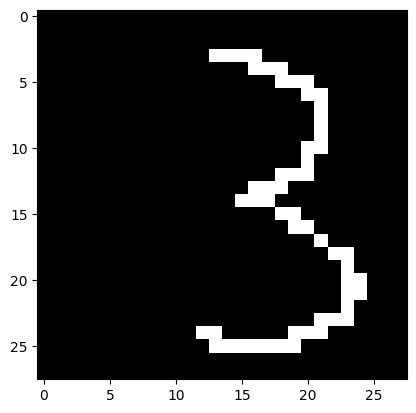

In [5]:
sample_index = 394

print(df.loc[sample_index, 'labels'])
plt.imshow(df.loc[sample_index, 'data'].reshape((28,28)), cmap = "gray")

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df["data"], df['labels'], test_size=0.1, random_state=42)

In [7]:
X_train = np.array(X_train.values.tolist())
X_test = np.array(X_test.values.tolist())

y_train = y_train.values
y_test = y_test.values

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(900, 784)
(100, 784)
(900,)
(100,)


In [8]:
clf = svm.SVC()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

In [9]:
sample_indexes = random.sample(range(0, len(X_test)), 5)

sample_data = X_test[sample_indexes]

sample_labels = y_test[sample_indexes]
sample_predictions = predicted[sample_indexes]

sample_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

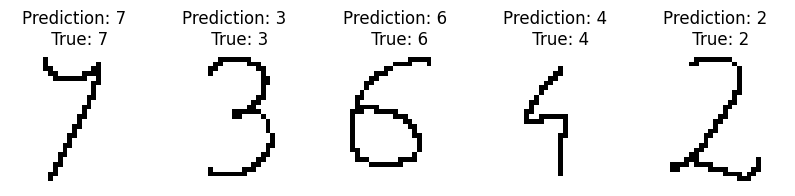

In [10]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, prediction, label in zip(axes, sample_data, sample_predictions, sample_labels):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction} \n True: {label}")

In [11]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.83      0.83      0.83         6
           2       1.00      1.00      1.00        13
           3       1.00      0.80      0.89        10
           4       0.67      1.00      0.80         6
           5       0.83      0.77      0.80        13
           6       1.00      0.92      0.96        13
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00         9
           9       0.82      1.00      0.90         9

    accuracy                           0.91       100
   macro avg       0.91      0.92      0.91       100
weighted avg       0.92      0.91      0.91       100




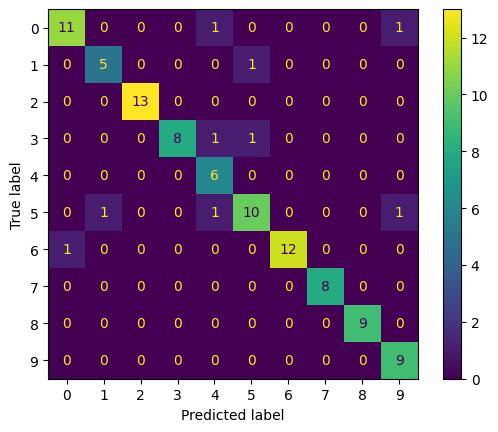

In [12]:
con_matrix = metrics.confusion_matrix(y_test, predicted)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=con_matrix)
disp.plot()

In [13]:
pickle.dump(clf, open("cutom_svm.sav", 'wb'))